In [1]:
!pip install pandas matplotlib seaborn wordcloud nltk --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Samarth
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
df = pd.read_csv('Tweets.csv')

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nSentiment Distribution:")
print(df['airline_sentiment'].value_counts())

Shape: (14640, 15)

Columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Sentiment Distribution:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


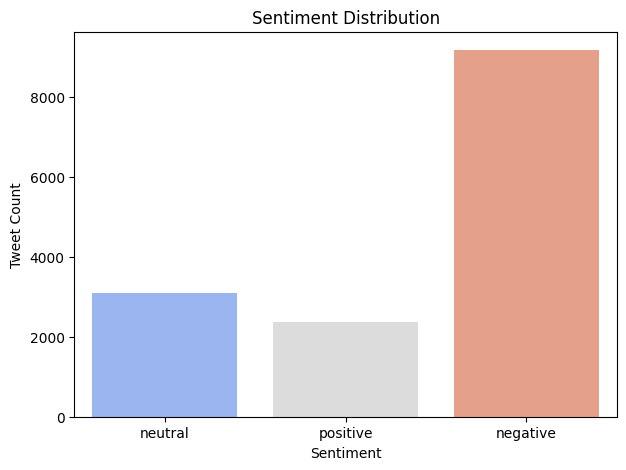

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='airline_sentiment', hue='airline_sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

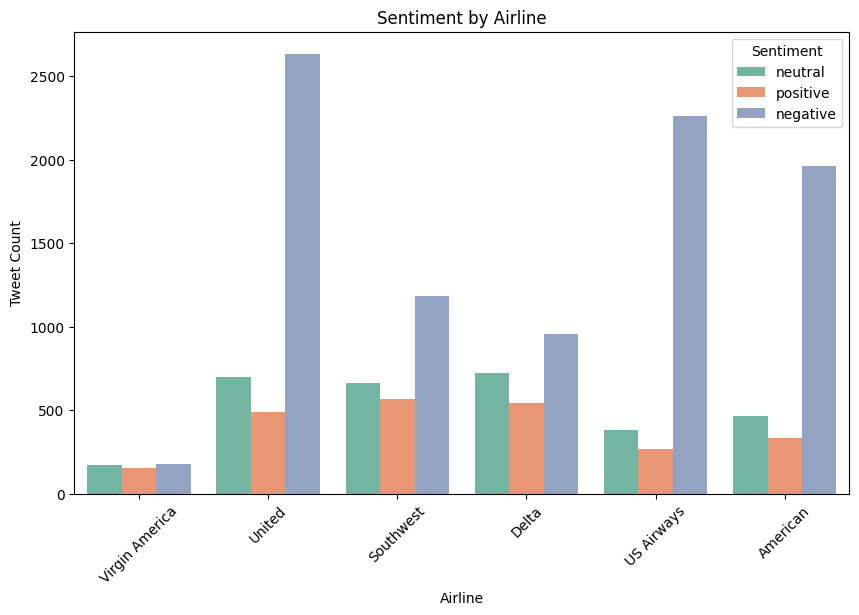

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set2')
plt.title('Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

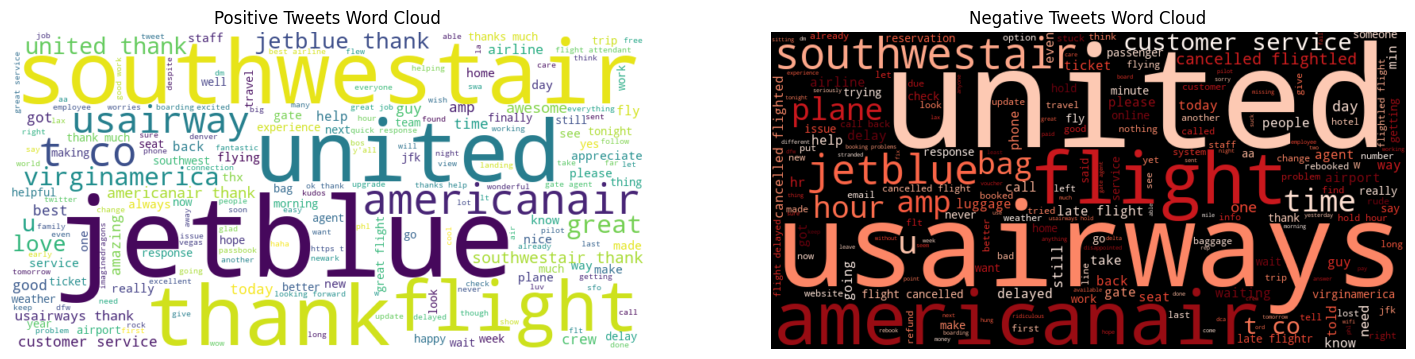

In [9]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.lower().split() if word not in stop_words and word not in string.punctuation])

positive_tweets = df[df['airline_sentiment'] == 'positive']['text'].apply(preprocess_text)
negative_tweets = df[df['airline_sentiment'] == 'negative']['text'].apply(preprocess_text)

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_tweets))
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(" ".join(negative_tweets))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].imshow(positive_wc, interpolation='bilinear')
ax[0].set_title('Positive Tweets Word Cloud')
ax[0].axis('off')

ax[1].imshow(negative_wc, interpolation='bilinear')
ax[1].set_title('Negative Tweets Word Cloud')
ax[1].axis('off')

plt.show()

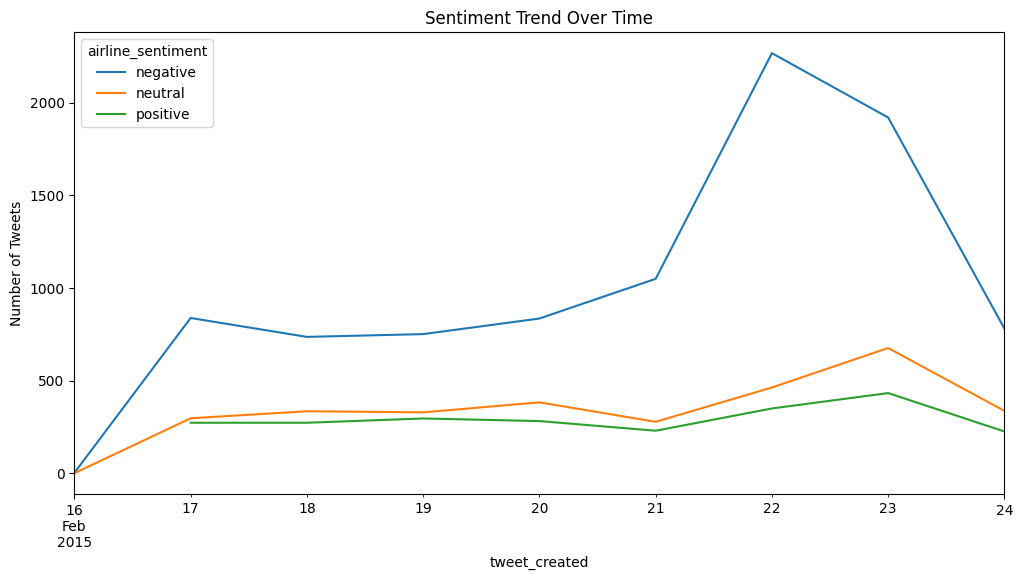

In [10]:
# Convert tweet time if needed
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df.set_index('tweet_created', inplace=True)

# Plot sentiment trend over time
df.resample('D')['airline_sentiment'].value_counts().unstack().plot(figsize=(12, 6))
plt.title('Sentiment Trend Over Time')
plt.ylabel('Number of Tweets')
plt.show()
